In [ ]:
# This is a notebook for the 2022 Advent of Code

#######
# Day 1
#######

In [ ]:
# Read the data in from the file
def get_data(): 
  with open("input_day1.txt", "r") as txt_file:
    return txt_file.readlines()

data=get_data()
data.append('\n') # this is to make sure the last line is read


In [ ]:
# read input_day1.txt and return a list of strings
# each elf has a board with a list of ingredients caloric values
def boards(data):
  boards=[]
  board=[]
  for line in data:
    if line == '\n':
      boards.append(board)
      board=[]
    else:
      board.append(line.strip())
  return boards

# the the elfs boards with the calories of their items
all_the_boards = boards(data)

# find the board with the most calories
def find_max_calories(all_the_boards):
  elf_cal=[]
  max_calories = 0
  for board in all_the_boards:
    calories = 0
    for item in board:
      calories += int(item)
    elf_cal.append(calories)
    if calories > max_calories:
      max_calories = calories
  return max_calories,elf_cal

# find the board with the most calories
max_calories, elf_cal = find_max_calories(all_the_boards)

print(max_calories)


In [ ]:
elf_cal_sorted = sorted(elf_cal, reverse=True)

In [ ]:
total_first_3 = elf_cal_sorted[0] + elf_cal_sorted[1] + elf_cal_sorted[2]
print(total_first_3)

# Day 2 #
# rock paper scisors tournament
#########

In [ ]:
# opponent
# A for rock
# B for paper
# C for scissors

# my plays
# X for rock
# Y for paper
# Z for scissors

# 1 point for rock
# 2 points for paper
# 3 points for scissors
# 0 if you lose / 3 for a draw / 6 for a win

# The function to check the strategy and calculate scores
# for part 1 of the problem
def test_strategy(strategy):
  points_for_my_play = {'X':1,'Y':2,'Z':3}
  points_for_my_result = {'lose':0,'draw':3,'win':6}
  score =0

  # go through the steps of the strategy
  for steps in strategy:
    opponent = steps[0]
    my_play = steps[1]

    # calculate the result
    # if my play was Rock
    if my_play=='X':
      if opponent=='A':
        result = 'draw'
        points_for_this_play = points_for_my_result['draw']+points_for_my_play['X']
        score += points_for_this_play
        
      elif opponent=='B':
        result = 'lose'
        points_for_this_play = points_for_my_result['lose']+points_for_my_play['X']
        score += points_for_this_play
        
      elif opponent=='C':
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['X']
        score += points_for_this_play
        
    # if my play was Paper
    elif my_play=='Y':
      if opponent=='A':
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif opponent=='B':
        result = 'draw'
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif opponent=='C':
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['Y']
        score += points_for_this_play
        
    # if my play was Scissors
    elif my_play=='Z':
      if opponent=='A':
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif opponent=='B':
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif opponent=='C':
        result = 'draw'
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Z']
        score += points_for_this_play

    print(opponent, my_play, result, points_for_this_play)    

  # print the score
  print(f'Total Score is :{score}')




In [ ]:
# Checking my code for the example provided in the problem
strategy =[['A','Y'],['B','X'],['C','Z']]
test_strategy(strategy)

In [ ]:
# Loading my actual file and creating a strategy from it
with open("input_day2.txt", "r") as txt_file:
  data = txt_file.readlines()

strategy =[]
for line in data:
  strategy.append(line.strip().split(' '))

test_strategy(strategy) 

In [ ]:
strategy

In [ ]:
# opponent
# A for rock
# B for paper
# C for scissors

# my plays
# X for i need to lose
# Y for it needs to be a draw
# Z for i need to win

# 1 point for rock
# 2 points for paper
# 3 points for scissors
# 0 if you lose / 3 for a draw / 6 for a win

# The function to check the strategy and calculate scores
# for part 1 of the problem
def test_strategy_part2(strategy):
  points_for_my_play = {'X':1,'Y':2,'Z':3}
  points_for_my_result = {'lose':0,'draw':3,'win':6}
  score =0

  # go through the steps of the strategy
  for steps in strategy:
    opponent = steps[0]
    my_play = steps[1]

    # calculate the result
    if opponent=='A': # if opponent is rock
      if my_play=='X':  # if i need to lose therefore being scissors
        result = 'lose'
        points_for_this_play = points_for_my_result['lose']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif my_play=='Y': # if i need to draw therefore being rock as well
        result = 'draw'
        points_for_this_play = points_for_my_result['draw']+points_for_my_play['X']
        score += points_for_this_play
        
      elif my_play=='Z': 
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Y']
        score += points_for_this_play
    
    elif opponent=='B': # if opponent is paper
      if my_play=='X': # if i need to lose therefore being rock
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['X']
        score += points_for_this_play
        
      elif my_play=='Y': # if i need to draw therefore being paper as well
        result = 'draw' 
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif my_play=='Z': # if i need to win therefore being scissors
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Z']
        score += points_for_this_play

    elif opponent=='C': # if opponent is scissors
      if my_play=='X': # if i need to lose therefore being paper
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif my_play=='Y': # if i need to draw therefore being scissors as well
        result = 'draw'
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif my_play=='Z': # if i need to win therefore being rock
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['X']
        score += points_for_this_play
        




    print(opponent, my_play, result, points_for_this_play)    

  # print the score
  print(f'Total Score is :{score}')



In [ ]:
# this is to test my function for the example provided in the problem
strategy2 =[['A','Y'],['B','X'],['C','Z']]
test_strategy_part2(strategy2)

In [ ]:
# running my function with the data from the file
# Loading my actual file and creating a strategy from it

with open("input_day2.txt", "r") as txt_file:
  data = txt_file.readlines()

strategy =[]
for line in data:
  strategy.append(line.strip().split(' '))


test_strategy_part2(strategy)

#########
# Day 3 #
#########

In [ ]:
# each ruksack has 2 compartments
# there is the same amount of items in each compartment
# first half is for the first compartment
# second half is for the second compartment

# Part 1

# rucksacks = ['vJrwpWtwJgWrhcsFMMfFFhFp','jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL','PmmdzqPrVvPwwTWBwg','wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn','ttgJtRGJQctTZtZT','CrZsJsPPZsGzwwsLwLmpwMDw']

import string
alphabet_lowercase = string.ascii_lowercase
alphabet_uppercase = string.ascii_uppercase


with open("input_day3.txt", "r") as txt_file:
  data = txt_file.readlines()

rucksacks =[]
for line in data:
  rucksacks.append(line.strip())



def find_common(first_compartment, second_compartment):
  common = []
  for i in first_compartment:
    if i in second_compartment:
      common.append(i)
  return common

def score_common(common):
  score = 0
  if len(common)>0:
      if common[0].isupper():
        place_value = alphabet_uppercase.find(common[0])
        score = place_value +1 + 26 # 26 is the place value of A and +1 because the place value starts at 0
      else:
        place_value = alphabet_lowercase.find(common[0])
        score = place_value + 1 # +1 because the index starts at 0
  
  return score

def do_the_rucksaks(rucksacks):
  total_score=0
  for i in rucksacks:
    first_compartment = i[:len(i)//2]
    second_compartment = i[len(i)//2:]
    this_one = score_common(find_common(first_compartment,second_compartment))
    print(f'The score is :{this_one}')
    total_score += this_one
  print(f'The total score for part 1 is :{total_score}')


do_the_rucksaks(rucksacks)



In [ ]:
# Elves are in groups of 3
# split the rucksacks in groups of 3

# rucksacks = ['vJrwpWtwJgWrhcsFMMfFFhFp','jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL','PmmdzqPrVvPwwTWBwg','wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn','ttgJtRGJQctTZtZT','CrZsJsPPZsGzwwsLwLmpwMDw']

with open("input_day3.txt", "r") as txt_file:
  data = txt_file.readlines()

rucksacks =[]
for line in data:
  rucksacks.append(line.strip())



def split_rucksacks(rucksacks): #this is to split the rucksacks in groups of 3
  rucksacks_groups =[]
  for i in range(0,len(rucksacks),3):
    rucksacks_groups.append(rucksacks[i:i+3])
  return rucksacks_groups

rucksacks_groups = split_rucksacks(rucksacks)

# find the common letters in each ruksack
def find_common_in_rucksack(rucksack1,rucksack2,rucksack3):
  common = []
  for i in rucksack1:
    if i in rucksack2 and i in rucksack3:
      common.append(i)
  return common

def score_common(common):
  score = 0
  if len(common)>0:
      if common[0].isupper():
        place_value = alphabet_uppercase.find(common[0])
        score = place_value +1 + 26 # 26 is the place value of A and +1 because the place value starts at 0
      else:
        place_value = alphabet_lowercase.find(common[0])
        score = place_value + 1 # +1 because the index starts at 0
  
  return score


total_score = 0
for group in rucksacks_groups:
  common = find_common_in_rucksack(group[0],group[1],group[2])
  print(f'The common letters are :{common}')
  score = score_common(common)
  print(f'The score is :{score}')
  total_score+=score

print(f'The total score for part 2 is :{total_score}')

# Day 4

In [ ]:
# load the data from the file or use the example provided in the problem

# assignments = ['2-4,6-8', '2-3,4-5', '5-7,7-9', '2-8,3-7', '6-6,4-6', '2-6,4-8']

with open("input_day4.txt", "r") as txt_file:
  data = txt_file.readlines()

assignments =[]
for line in data:
  assignments.append(line.strip())



In [ ]:
# the functions to check if the assigned space is contained in the other elf range

def check_if_first_in_second(first_elf_start,first_elf_end,second_elf_start,second_elf_end):
  if first_elf_start >= second_elf_start and first_elf_end <= second_elf_end:
    return 1
  else:
    return 0

def check_if_second_in_first(first_elf_start,first_elf_end,second_elf_start,second_elf_end):
  if second_elf_start >= first_elf_start and second_elf_end <= first_elf_end:
    return 1
  else:
    return 0

def check_if_overlap(first_elf_start,first_elf_end,second_elf_start,second_elf_end):
  if first_elf_start <= second_elf_start and first_elf_end >= second_elf_start:
    return 1
  elif first_elf_start <= second_elf_end and first_elf_end >= second_elf_end:
    return 1
  elif second_elf_start <= first_elf_start and second_elf_end >= first_elf_start:
    return 1
  elif second_elf_start <= first_elf_end and second_elf_end >= first_elf_end:
    return 1
  else:
    return 0

def part1():
  # Start the scan
  score =0
  for i in range(len(assignments)):
    first_elf = assignments[i].split(',')[0]
    second_elf = assignments[i].split(',')[1]

    first_elf_start = int(first_elf.split('-')[0])
    first_elf_end = int(first_elf.split('-')[1])

    second_elf_start = int(second_elf.split('-')[0])
    second_elf_end = int(second_elf.split('-')[1])

    if first_elf_start == second_elf_start and first_elf_end == second_elf_end:
      score += 1
    else:
      score += check_if_first_in_second(first_elf_start,first_elf_end,second_elf_start,second_elf_end)
      score += check_if_second_in_first(first_elf_start,first_elf_end,second_elf_start,second_elf_end)

  print(f'There is {score} enclosing pairs')

def part2():
  # Start the scan
  score =0
  for i in range(len(assignments)):
    first_elf = assignments[i].split(',')[0]
    second_elf = assignments[i].split(',')[1]

    first_elf_start = int(first_elf.split('-')[0])
    first_elf_end = int(first_elf.split('-')[1])

    second_elf_start = int(second_elf.split('-')[0])
    second_elf_end = int(second_elf.split('-')[1])

    if first_elf_start == second_elf_start and first_elf_end == second_elf_end:
      score += 1
    else:
      score += check_if_overlap(first_elf_start,first_elf_end,second_elf_start,second_elf_end)

  print(f'There is {score} overlapping pairs')


part1()
part2()

# . day 5
#######

In [ ]:
# Creating the stacks data from the input file
# Part 1 with the Crane model 9000...
with open("input_day5_stacks.txt", "r") as txt_file:
  data = txt_file.readlines()


def process(line): # process each line to match a template format, so the matrix is square
  pattern = '[#] ' *9
  new_line=''
  for i in range(len(line)):
    if line[i] != pattern[i] and line[i] == ' ':
      new_line += pattern[i]
    else:
      new_line += line[i]
      
  return new_line

stacks =[] # a temporary list to store the stacks in a "line basis"
for line in data:
  t = process(line) #get each line
  t = t.replace('[', '') # remove un-necessary characters
  t = t.replace(']', '') # remove un-necessary characters
  t = t.replace('\n', '') # remove un-necessary characters
  t =t.split(' ') # split the string into a list
  stacks.append(t) # add the first 17 characters to the list


# Transpose the data so that i get the columns
real_stacks =[] # a list to store the stacks in a "stack basis"
for s in range(0,9):
  this_stack=[]
  for i in range(0,8):
    line = stacks[7-i]
    # print(f'Row {7-i} : {line}')
    if line[s] != '#':
      this_stack.append(line[s])
  real_stacks.append(this_stack)


## Data is now in the real_stacks list

def draw_the_stack():
  # print the stacks
  for s in range(0,9):
    print(f'Stack {s+1} is now : {real_stacks[s]}')

def move(how_many,from_stack,to_stack):
  # move the number of items from the from_stack to the to_stack
  for i in range(0,how_many):
    real_stacks[to_stack-1].append(real_stacks[from_stack-1].pop())


def message():
  # print the message
  t=''
  for i in range(0,9):
    l = len(real_stacks[i])
    t += real_stacks[i][l-1]
  print(f'The message on top of the crates is :{t}')

# Load the moves data
with open("input_day5_moves.txt", "r") as txt_file:
  data = txt_file.readlines()

the_moves=[]
# Process the moves
for line in data:
  t= line.replace('move ', '')
  t= t.replace(' from ', ',')
  t= t.replace(' to ', ',')
  the_moves.append(t)

# Part 1
print('This is for part 1')
for i in range(len(the_moves)):
  how_many = int(the_moves[i].split(',')[0])
  from_stack = int(the_moves[i].split(',')[1])
  to_stack = int(the_moves[i].split(',')[2])
  move(how_many,from_stack,to_stack)

# draw_the_stack()
message()


In [ ]:
# Creating the stacks data from the input file
# Part 2 with the Crane model 9001...
with open("input_day5_stacks.txt", "r") as txt_file:
  data = txt_file.readlines()


def process(line): # process each line to match a template format, so the matrix is square
  pattern = '[#] ' *9
  new_line=''
  for i in range(len(line)):
    if line[i] != pattern[i] and line[i] == ' ':
      new_line += pattern[i]
    else:
      new_line += line[i]
      
  return new_line

stacks =[] # a temporary list to store the stacks in a "line basis"
for line in data:
  t = process(line) #get each line
  t = t.replace('[', '') # remove un-necessary characters
  t = t.replace(']', '') # remove un-necessary characters
  t = t.replace('\n', '') # remove un-necessary characters
  t =t.split(' ') # split the string into a list
  stacks.append(t) # add the first 17 characters to the list


# Transpose the data so that i get the columns
real_stacks =[] # a list to store the stacks in a "stack basis"
for s in range(0,9):
  this_stack=[]
  for i in range(0,8):
    line = stacks[7-i]
    # print(f'Row {7-i} : {line}')
    if line[s] != '#':
      this_stack.append(line[s])
  real_stacks.append(this_stack)


## Data is now in the real_stacks list

def draw_the_stack():
  # print the stacks
  for s in range(0,9):
    print(f'Stack {s+1} is now : {real_stacks[s]}')

def move_9001(how_many, from_stack, to_stack):
  # move the number of items from the from_stack to the to_stack
  temp = real_stacks[from_stack-1][-how_many:]
  for i in temp:
    real_stacks[to_stack-1].append(i)
    real_stacks[from_stack-1].pop()



def message():
  # print the message
  t=''
  for i in range(0,9):
    l = len(real_stacks[i])
    t += real_stacks[i][l-1]
  print(f'The message on top of the crates is :{t}')

# Load the moves data
with open("input_day5_moves.txt", "r") as txt_file:
  data = txt_file.readlines()

the_moves=[]
# Process the moves
for line in data:
  t= line.replace('move ', '')
  t= t.replace(' from ', ',')
  t= t.replace(' to ', ',')
  the_moves.append(t)

# Part 2
print('This is for part 2')
for i in range(len(the_moves)):
  how_many = int(the_moves[i].split(',')[0])
  from_stack = int(the_moves[i].split(',')[1])
  to_stack = int(the_moves[i].split(',')[2])
  move_9001(how_many,from_stack,to_stack)

# draw_the_stack()
message()

# Day 6

In [ ]:
# this is the data in the example
data_stream = 'mjqjpqmgbljsphdztnvjfqwrcgsmlb'
data_stream ='bvwbjplbgvbhsrlpgdmjqwftvncz'
data_stream = 'nppdvjthqldpwncqszvftbrmjlhg'
data_stream = 'nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg'
data_stream = 'zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw'

In [ ]:
# Part 1
# Load the data from the puzzle
with open("input_day6.txt", "r") as txt_file:
  data = txt_file.readlines()

data_stream = data[0].strip()

def find_marker(data_stream):
  for i in range(len(data_stream)-3):
    packet = data_stream[i]+data_stream[i+1]+data_stream[i+2]+data_stream[i+3]
    if data_stream[i]!=data_stream[i+1] and data_stream[i+1]!=data_stream[i+2] and data_stream[i+2]!=data_stream[i+3] and data_stream[i]!=data_stream[i+2] and data_stream[i]!=data_stream[i+3] and data_stream[i+1]!=data_stream[i+3]:
      answer = f'Found a Marker : {packet} when we are at position {i+4}'
      return answer

find_marker(data_stream)

In [ ]:
data_stream ='mjqjpqmgbljsphdztnvjfqwrcgsmlb'
data_stream ='bvwbjplbgvbhsrlpgdmjqwftvncz'
data_stream ='nppdvjthqldpwncqszvftbrmjlhg'
data_stream = 'nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg'

In [ ]:
# Part 2
with open("input_day6.txt", "r") as txt_file:
  data = txt_file.readlines()

data_stream = data[0].strip()

def get_message_packet(data_stream):
  for i in range(len(data_stream)-13):
    packet=''
    for j in range(14):
      packet+=data_stream[i+j]
    if check_if_message(packet):
      print(packet, check_if_message(packet), i+14)
      break

def check_if_message(packet):
  for c in packet:
    if packet.count(c) > 1:
      return False
  return True

get_message_packet(data_stream)

# Day 7

In [ ]:
# use this to load the data either the example or the real data
with open("input_day7.txt", "r") as txt_file:
  data = txt_file.readlines()

all_cmd =[]
for line in data:
  all_cmd.append(line.strip())
  

In [ ]:
# assuming that the computer is top of the tree
#and that all the commands are loaded into the all_cmd variable

class Directory:
  def __init__(self, name, parent):
    self.name = name
    self.files = []
    self.directories = []
    self.parent = parent

  def sub_directories(self):
    sub_directories = {directory.name:directory for directory in self.directories}
    return sub_directories

  def size(self):
    size = 0
    for file in self.files:
      size += file.size
    for directory in self.directories:
      size += directory.size()
    return size

class File:
  def __init__(self, name, size):
    self.name = name
    self.size = size

class Computer:
  def __init__(self):
    self.root = Directory('/', None)
    self.cwd = self.root
    self.data = all_cmd

  def space(self):
    return self.root.size()

  def ls(self,line):
    if line.startswith('dir'): # we are getting a directory name
      self.cwd.directories.append(Directory(line[4:], self.cwd))
    else:
      size,name = line.split() # we are getting a file name and size
      self.cwd.files.append(File(name, int(size)))

  def cd(self,directory_name):
    if directory_name == '..': # go up one directory
      if self.cwd != self.root: # don't go above the root
        self.cwd = self.cwd.parent 
    elif directory_name == '/': # go to the root
      self.cwd = self.root
    else: # it must be that we are going to a sub directory (no checking for errors)
      self.cwd = self.cwd.sub_directories()[directory_name]  

  def process_cmd(self):
    for line in self.data:
      if line.startswith('$ ls'): # ignore as the real information comes afterwards 
        continue

      elif line.startswith('$ cd'): # change directory
        directory = line.split()[-1]
        self.cd(directory)
        
      else: # must be a file or directory
        self.ls(line)


# Create a data model object for the computer and its files and directories
my_computer = Computer()
my_computer.process_cmd() # load the data into the data model
total_used = my_computer.space() # get the total used space
print(f'Total used space {total_used}')

# Find all the folders and and files that are on the system
def print_name_size(node):
  for n in node:
    # print(n.name, n.size())
    list.append([n.name, n.size()])
    print_name_size(n.directories) # recursive to go down the tree
  return list

# us a global variable to store the list of files and size
list =[]
print_name_size(my_computer.root.directories) # call the recursive function 

# find the total size of the files and folders that are less than 100000
total_sum=0
for i in range(len(list)):
  if list[i][1] <= 100000:
    # print(list[i])
    total_sum+=list[i][1]
print(f'The sum for Part 1 is :{total_sum}')

print()
print()
print()
print('Part 2 :')
disk_space = 70000000
required = 30000000
total_free = disk_space-total_used
print(f'Total free is {total_free} and required is {required}')
need_to_free = required - total_free
print(f'Need to free a minimum of {need_to_free} to get {required} free')
print()
# There might be more than one candidate and the first one might not be the smallest
candidates=[]
for i in range(len(list)):
  
  if int(list[i][1]) >= int(need_to_free):
    print(list[i],'is good')
    candidates.append(list[i][1])

print()
sorted_candidates = sorted(candidates) # sort the candidates to find the smallest
print(f'The smallest candidate is {sorted_candidates[0]}')

In [ ]:
a= {1,2,3,4,5,6,7,8,9,10}
b = { 2*c for c in a}
print(b)

# Day 8

In [ ]:
# Part 1
with open("input_day8.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()


In [ ]:
number_of_column_trees = len(data[0])
number_of_row_trees = len(data)
number_of_perimeter_trees = 2 * number_of_column_trees + 2*(number_of_row_trees - 2)

print(f'There is { number_of_perimeter_trees} perimeter trees')

# Keep ing track of the list of tress is an overkill but might be helpful for part 2 ?
# Also not very efficient in general...
def test_tree(size,i,j):
  up=[]
  down=[]
  left=[]
  right=[]
  check=0
  visible_in_this_direction=0
  overall_visible = 0
  # print(f'Checking {size} at {i},{j}')
  
  visible_in_this_direction=1
  for k in range(0,i):
    check = int(data[k][j])
    up.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Up is :{up} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  visible_in_this_direction=1
  for k in range(i+1,len(data)):
    check = int(data[k][j])
    down.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Down is :{down} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  visible_in_this_direction=1
  for k in range(0,j):
    check = int(data[i][k])
    left.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Left is :{left} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  visible_in_this_direction=1
  for k in range(j+1,len(data[i])):
    check = int(data[i][k])
    right.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Right is :{right} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  if overall_visible  > 0:
    overall_visible = 1
  
  # print(f'Overall visible is {overall_visible}')
  # print()
  return overall_visible
  

# Go through all the inside trees
count_visible = 0
for i in range(1,len(data)-1):
  for j in range(1,len(data[i])-1):
    tree_size = int(data[i][j])
    # print(tree_size, test_tree(tree_size,i,j))
    count_visible += test_tree(tree_size,i,j)

print(f' and {count_visible} visible trees inside')
print(f'There is { number_of_perimeter_trees + count_visible} trees visbile in total')


In [ ]:
#part 2
# scenic scoring is the number of trees visible from a given point in all four directions
# the scoring is the sum of the number of trees visible in each direction
# i could re-use a fair amount of code but had to change the direction of looping and keep a track of the number of trees visible in each direction


def scenic_scoring(size,i,j, debug):
  up=[]
  down=[]
  left=[]
  right=[]
  check=0
  visible_in_this_direction=0
  overall_visible = 0
  if debug: 
    print(f'Checking {size} at {i},{j}')
  
  # Check up
  visible_in_this_direction=0
  for k in range(i-1, -1,-1):
    check = int(data[k][j])
    up.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Up is :{up} and therefore {visible_in_this_direction}')
  overall_visible = visible_in_this_direction

  # Check Down
  visible_in_this_direction=0
  for k in range(i+1,len(data)):
    check = int(data[k][j])
    down.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Down is :{down} and therefore {visible_in_this_direction}')
  overall_visible *= visible_in_this_direction

  # Check Left
  visible_in_this_direction=0
  for k in range(j-1, -1, -1):
    check = int(data[i][k])
    left.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Left is :{left} and therefore {visible_in_this_direction}')
  overall_visible *= visible_in_this_direction

  # Check Right
  visible_in_this_direction=0
  for k in range(j+1,len(data[i])):
    check = int(data[i][k])
    right.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Right is :{right} and therefore {visible_in_this_direction}')
  overall_visible *= visible_in_this_direction

  if debug:
    print(f'Overall Scenic Score is {overall_visible}')
    print()
  return overall_visible



In [ ]:

# Go through all the inside trees
max_scenic_score = 0
for i in range(1,len(data)-1): # for each row
  for j in range(1,len(data[i])-1): # for each column
    tree_size = int(data[i][j])
    new_scenic_score = scenic_scoring(tree_size,i,j,False)
    if new_scenic_score > max_scenic_score:
      max_scenic_score = new_scenic_score

print(f'The maximum scenic score is {max_scenic_score}')

In [ ]:
data

In [ ]:
location_row = 3
location_column = 2
size = int(data[location_row][location_column])
print(size)
scenic_scoring(size,location_row,location_column,True)

In [ ]:
data

# Day 9

In [ ]:
# Part 1
with open("input_day9.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()


In [ ]:
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import PIL.ImageFilter as ImageFilter
import random, math



width_line = 5
start_x = 0
start_y = 0
points = [[start_x,start_y]] # This keeps a track of the head of the rope
tail_points =[[start_x,start_y]] # This keeps a track of the tail of the rope, and starts at same place as head
zoom= 0
padding = 2
canvas_x = 5000
canvas_y = 5000

# this is un necessary but I wanted to see the rope as it was being drawn, at least the head of it
image = Image.new("RGB", (canvas_x, canvas_y))
draw = ImageDraw.Draw(image)


def make_a_move(dir,steps,x,y): # This takes a direction and a number of steps and returns the new x and y
  global points, tail_points
  current_tail = tail_points[-1] # This is the current tail
  if dir == 'R':
    for i in range(steps):
      x += 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (x - current_tail[0]) > 1:
        tail_points.append(points[-2])
        
      
  elif dir == 'L':
    for i in range(steps):
      x -= 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (current_tail[0]-x) > 1:
        tail_points.append(points[-2])
      
    
  elif dir == 'U':
    for i in range(steps):
      y += 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (y - current_tail[1]) > 1:
        tail_points.append(points[-2])

    
  elif dir == 'D':
    for i in range(steps):
      y -= 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (current_tail[1]-y) > 1:
        tail_points.append(points[-2])


  return new_x, new_y

def decode(move): # This takes a move and decodes it into a direction and a number of steps
  direction = move[0]
  steps = int(move[1:])
  return direction, steps

def find_dim():
  global points
  min_x = 0
  max_x = 0
  min_y = 0
  max_y = 0
  for i in points:
    if i[0] < min_x:
      min_x = i[0]
    if i[0] > max_x:
      max_x = i[0]
    if i[1] < min_y:
      min_y = i[1]
    if i[1] > max_y:
      max_y = i[1]
  width_x = max_x - min_x
  width_y = max_y - min_y
  return min_x, max_x, min_y, max_y, width_x, width_y

  
# Create all the points from the data
for i in data:
  direction, steps = decode(i)
  start_x, start_y = make_a_move(direction,steps,start_x,start_y)

# Points contains all the points visited, so if we remove the duplicates we can find all the visited points
# remove duplicates from the points list
unique_visited = [list(x) for x in set(tuple(x) for x in tail_points)]
print(f'Number of points overall for the tail is {len(tail_points)}')
print(f'Number of unique points is {len(unique_visited)}')



# this is to make a scaled image of the points etc
min_x, max_x, min_y, max_y, width_x, width_y = find_dim()
zoom_x = canvas_x/width_x
zoom_y = canvas_y/width_y
zoom = int(min(zoom_x,zoom_y)*.8)

print(f'Zoom is {zoom}')
print(f'size of drawing is {width_x} x {width_y}')
print(f'Canvas is {canvas_x} x {canvas_y}')

print(f'Min X is {min_x} and Max X is {max_x}')
print(f'Min Y is {min_y} and Max Y is {max_y}')


def draw_the_points(list_of_points, colour_points): # This draws a list of points on the image
  origin_x = 2500
  origin_y = 1000

  for i in range(len(list_of_points)):
    new_real_x = origin_x + list_of_points[i][0]*zoom
    new_real_y = origin_y - list_of_points[i][1]*zoom
    draw.rectangle((new_real_x,new_real_y,new_real_x+zoom-padding,new_real_y+zoom-padding), fill=colour_points, outline=(255,255,255))


# print(data)
draw_the_points(points, (120,120,240))
# image.show()

draw_the_points(tail_points,(2400,120,120))
display(image)




In [ ]:
points

In [ ]:
# Will come back to part 2 later


In [ ]:
# Day 10 !!

In [ ]:
# Part 1
with open("input_day10.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()

In [ ]:
data

In [ ]:
import string

register_x = 1
addx_cycle = 2
total_cycles = 0
step = 0
next_trigger = 0
signal_total = 0

def execute_code(step, code,value):
  global register_x , total_cycles, addx_cycle, noop_cycle
  if code == 'noop':
    total_cycles+=1
    report_status(step, code,value, register_x, total_cycles)
  elif code == 'addx':
    for i in range(addx_cycle):
      total_cycles+=1
      report_status(step, code, value, register_x, total_cycles)
    register_x += value

def report_status(step, code, value , register_x, total_cycles):
  global which_trigger, triggers, signal_total
  signal_strength = register_x * total_cycles
  if total_cycles == triggers[which_trigger]:
    signal_total += signal_strength
    print(f'Instruction {step} Code is {code} Value is {value} Total cycles is {total_cycles} , Register X is {register_x} Signal strength is {signal_strength} Signal total is {signal_total}')
    which_trigger+=1
 
  

triggers = [20,60,100,140,180,220,220]
which_trigger = 0
for i in range(len(data)):
  code_instruction = data[i]
  if code_instruction.startswith('addx'):
    code, value = data[i].split(' ')
    value = int(value)
    
  elif code_instruction.startswith('noop'):
    code = data[i]
    value = 0
  
  execute_code(i, code,value)
  


In [ ]:
# Part 2
def sprite(value):
  base ='###'
  left_draw = '.'*(value-1)
  txt = left_draw + base + 40*'.'
  txt = txt[:40]
  return txt

# test_16 = '...............###......................'
# test_5 = '....###.................................'

mine = sprite(0)
print(mine)


In [ ]:
with open("input_day10.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()

X = 1
cycles = 0
pixels = list(" " * 40 * 6)

def update_pixels(X, cycles, pixels):
	pos = (cycles - 1) % 40
	if pos in {X-1, X, X+1}:
		pixels[cycles - 1] = "#"
		

for code_instruction in data:
	code_instruction = code_instruction.split()
	
	if code_instruction[0] == "noop":
		cycles += 1
		update_pixels(X, cycles, pixels)
		
	elif code_instruction[0] == "addx":
		cycles += 1
		update_pixels(X, cycles, pixels)
		
		cycles += 1
		update_pixels(X, cycles, pixels)			
		X += int(code_instruction[1])
			
# Draw the pixels
for i in range(0, 201, 40):
	print("".join(pixels[i: i + 40]))

In [ ]:
# Day 11 !!

In [ ]:
from tqdm import tqdm

class Monkey:
  def __init__(self, starting_items,operation,division,to_monkeys):
    self.starting_items = starting_items
    self.operation = operation
    self.division = division
    self.to_monkeys = to_monkeys
    self.total_inspections = 0

  def process(self, worry):
    self.total_inspections += 1
    if self.operation[0] == '+':
      new_worry = worry + self.operation[1]
    elif self.operation[0] == '*':
      if self.operation[1] == '*':
        new_worry = worry * worry
      else:
        new_worry = worry * self.operation[1]
    
    # new_worry = new_worry // 3 #monkey gets bored, removed in part 2
    if new_worry % self.division == 0:
        new_monkey = self.to_monkeys[0]
    else:
        new_monkey = self.to_monkeys[1]
    return new_worry, new_monkey

  def receive(self, worry):
    self.starting_items.append(worry)


monkeys=[]
# this is data for example monkeys
monkeys.append(Monkey([79,98],['*',19],23,[2,3])) #monkey 0
monkeys.append(Monkey([54,65,75,74],['+',6],19,[2,0])) # monkey 1
monkeys.append(Monkey([79,60,97],['*','*'],13,[1,3])) # monkey 2
monkeys.append(Monkey([74],['+',3],17,[0,1])) # monkey 3

# monkeys.append(Monkey([89, 73, 66, 57, 64, 80],['*',3],13,[6,2])) #monkey 0
# monkeys.append(Monkey([83, 78, 81, 55, 81, 59, 69],['+',1],3,[7,4])) #monkey 1
# monkeys.append(Monkey([76, 91, 58, 85],['*',13],7,[1,4])) #monkey 2
# monkeys.append(Monkey([71, 72, 74, 76, 68],['*','*'],2,[6,0])) #monkey 3
# monkeys.append(Monkey([98, 85, 84],['+',7],19,[5,7])) #monkey 4
# monkeys.append(Monkey([78],['+',8],5,[3,0])) #monkey 5
# monkeys.append(Monkey([86, 70, 60, 88, 88, 78, 74, 83],['+',4],11,[1,2])) #monkey 6
# monkeys.append(Monkey([81, 58],['+',5],17,[3,5])) #monkey 7



def process_monkey(this_monkey):
  for item in monkeys[this_monkey].starting_items:
    worry_level, new_monkey = monkeys[this_monkey].process(item)
    # print(f'Processing item {item} Worry level is {worry_level} , New monkey is {new_monkey}')
    monkeys[new_monkey].receive(worry_level)
  monkeys[this_monkey].starting_items = []

# Do a round
def do_a_round():
  for i in range(len(monkeys)):
    # print(f'Monkey {i}:')
    process_monkey(i)

def show_status():
  print()
  print()
  inspections_list=[]
  # Print Status of all monkeys
  for i in range(len(monkeys)):
    print(f'Monkey {i} has {monkeys[i].starting_items}, and did {monkeys[i].total_inspections} inspections')
    inspections_list.append(monkeys[i].total_inspections)
  print()
  sorted_list = sorted(inspections_list, reverse=True)
  print(sorted_list)
  print(f'Level of Monkey Business is {sorted_list[0]*sorted_list[1] }')

for i in tqdm(range(20)):
  # Do a round
  do_a_round()

show_status()




# Day 12

In [ ]:
import numpy as np

altitudes = "SabcdefghijklmnopqrstuvwxyzE"

with open("input_day12_example.txt", "r") as txt_file:
  data = np.array([[altitudes.index(c) for c in line.strip()] for line in txt_file.readlines()])
  

In [ ]:
data

In [ ]:
def allowed_move(p,grid):
    xp,yp = p
    allowed = []
    for dx,dy in [(-1,0),(0,1),(1,0),(0,-1)]:
        xn,yn = xp+dx,yp+dy
        if xn>=0 and xn<len(grid[0]) and yn>=0 and yn<len(grid):
            if grid[yn][xn]-grid[yp][xp]<=1:
                allowed.append((xn,yn))
    return allowed


def pathFinder(grid,S):
    visited = []
    paths = [[S]]
    while len(paths):
        path = paths.pop(0)
        for a in allowed_move(path[-1],grid):
            if (a not in path) and (a not in visited):
                newpath = list(path)
                newpath.append(a)
                xa,ya=a
                if grid[ya][xa]==27:
                    return newpath
                else:
                    paths.append(newpath)
                    visited.append(a)
    return []
                    
def where_is_start(grid):
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            if grid[y][x]==0:
                return (x,y)
    return None

start = where_is_start(data)
print(start)

the_one = pathFinder(data,start)
print(len(the_one)-1)
print(the_one)



In [ ]:
import matplotlib.pyplot as plt

map = np.copy(data) #make a copy of the data wiht same dimensions
i=0
for x,y in the_one: # for all the visisted points
    i +=5
    map[y][x] = 100+i # set the value to 100

# plot the map
plt.figure(figsize=(21,7))
plt.imshow(map)



In [ ]:
map

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

In [ ]:
grid = Grid(matrix=data)

In [ ]:
start = grid.node(0, 0)
end = grid.node(5, 2)

In [ ]:
finder = AStarFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

In [ ]:
print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

In [ ]:
# Day 13


In [1]:
with open("input_day13.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()

In [2]:
import json
pairs =[]
for i in range(0,len(data)-1,3):
  pairs.append([data[i],data[i+1]])

In [3]:
def check(left,right):
  for index in range(len(left)):
    # print(left[index],right[index])
    if index >= len(right):
      return -1
    if type(left[index]) is int and type(right[index]) is int:
      if left[index] < right[index]:
        return 1
      elif left[index] > right[index]:
        return -1
      
    elif type(left[index]) is list and type(right[index]) is list:
      new_result = check(left[index],right[index])
      if new_result !=0:
        return new_result
    
    elif type(left[index]) is list:
      new_result = check(left[index],[right[index]])
      if new_result !=0:
        return new_result
    
    elif type(right[index]) is list:
      new_result = check([left[index]],right[index])
      if new_result !=0:
        return new_result

  if len(left) == len(right):
    return 0
  return 1


the_sum = 0
for which_pair in range(len(pairs)):

  # print(pairs[which_pair][0], '  ', pairs[which_pair][1])
  result = check(json.loads(pairs[which_pair][0]),json.loads(pairs[which_pair][1]))
  if result == 1:
    the_sum += which_pair+1
    print(f'Correct order for index  {which_pair+1}')

print(f'The total of indexes is {the_sum}')


Correct order for index  2
Correct order for index  4
Correct order for index  5
Correct order for index  6
Correct order for index  8
Correct order for index  11
Correct order for index  12
Correct order for index  15
Correct order for index  17
Correct order for index  18
Correct order for index  19
Correct order for index  20
Correct order for index  22
Correct order for index  23
Correct order for index  24
Correct order for index  26
Correct order for index  29
Correct order for index  34
Correct order for index  35
Correct order for index  36
Correct order for index  40
Correct order for index  41
Correct order for index  42
Correct order for index  43
Correct order for index  45
Correct order for index  48
Correct order for index  49
Correct order for index  50
Correct order for index  55
Correct order for index  56
Correct order for index  63
Correct order for index  66
Correct order for index  68
Correct order for index  73
Correct order for index  76
Correct order for index  

In [4]:
# Part 2 - Day 13
import json
packets =[]
for i in range(len(data)):
  if data[i] != '':
    packets.append(json.loads(data[i]))
packets.append([[2]])
packets.append([[6]])


In [ ]:
packets

In [5]:
from functools import cmp_to_key
packets.sort(key=cmp_to_key(check), reverse=True)

mult = 1
for i in range(len(packets)):
  if packets[i]==[[2]] or packets[i]== [[6]]:
    mult *= i+1
print(f'The total of indexes is {mult}')

The total of indexes is 22852


In [ ]:
packets

# Day 14

The smallest x si :494, the largest x is:503, the minimum y is:0, the max y is:9
The grid is therefore 9 wide and 9 high
After reading all the path for the walls, the grid looks like this:


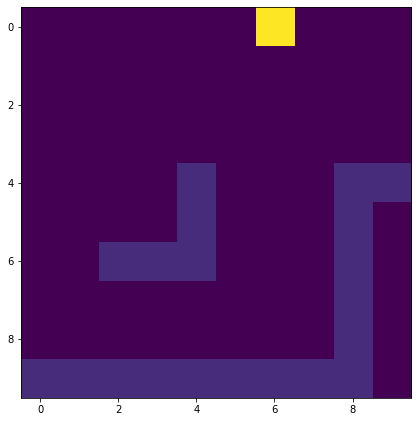

In [229]:
# try to find the min and max of the points
# so we can offset the points to the origin
# and then we can use numpy to create the grid
# Part 1

with open("input_day14_example.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()


import numpy as np
import matplotlib.pyplot as plt

xmin =int(data[0].split(' -> ')[0].split(',')[0])
xmax =int(data[0].split(' -> ')[0].split(',')[0])
ymin =int(data[0].split(' -> ')[0].split(',')[1])
ymax =int(data[0].split(' -> ')[0].split(',')[1])

for line in data:
  the_points  = line.split(' -> ')
  for point in the_points:
    point = point.split(',')
    if int(point[0]) < xmin:
      xmin = int(point[0])
    if int(point[0]) > xmax:
      xmax = int(point[0])
    if int(point[1]) < ymin:
      ymin = int(point[1])
    if int(point[1]) > ymax:
      ymax = int(point[1])

ymin=0 # we know that the y is always positive
width_x = xmax - xmin
width_y = ymax - ymin

print(f'The smallest x si :{xmin}, the largest x is:{xmax}, the minimum y is:{ymin}, the max y is:{ymax}')
print(f'The grid is therefore {width_x} wide and {width_y} high')

# create the grid with empty values
new_data = np.zeros((width_y+1,width_x+1), dtype=int)
new_data[0,500-xmin] = 8 # we start at 500

def populate (data, start,end):
  global xmin,ymin # we need to offset the points to the origin
  x_start = int(start[0])-xmin
  y_start = int(start[1])-ymin
  x_end = int(end[0])-xmin
  y_end = int(end[1])-ymin
  if x_start > x_end: # we need to make sure that the start is always smaller than the end
    x_start,x_end = x_end,x_start
  if y_start > y_end:
    y_start,y_end = y_end,y_start
  
  for i in range(x_start,x_end+1):
    for j in range(y_start,y_end+1):
      data[j,i] = 1
  return data


# this will go through the data and build a list of walls to build
def get_points(line):
  points = line.split(' -> ')
  temp=[]
  for point in points:
    temp.append([int(point.split(',')[0]),int(point.split(',')[1])])

  return temp

for i in range(len(data)):
  # print(get_points(data[i]))
  path = get_points(data[i])
  sub_path = []
  for j in range(len(path)-1):
    sub_path.append([path[j],path[j+1]])
    
  for k in range(len(sub_path)):
    start = sub_path[k][0] 
    end = sub_path[k][1]
    new_data = populate(new_data,start,end)




print('After reading all the path for the walls, the grid looks like this:')
# plot the map
map = np.copy(new_data)
plt.figure(figsize=(7,21))
plt.imshow(map)

The smallest x si :310, the largest x is:671, the minimum y is:0, the max y is:168
The grid is therefore 361 wide and 168 high
After reading all the path for the walls, the grid looks like this:


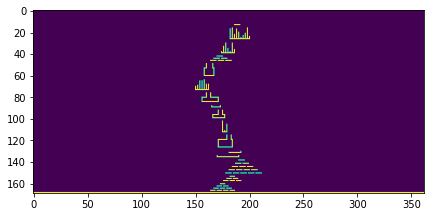

In [259]:
# try to find the min and max of the points
# so we can offset the points to the origin
# and then we can use numpy to create the grid
# Part 2
import numpy as np
import matplotlib.pyplot as plt


with open("input_day14.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()


xmin =int(data[0].split(' -> ')[0].split(',')[0])
xmax =int(data[0].split(' -> ')[0].split(',')[0])
ymin =int(data[0].split(' -> ')[0].split(',')[1])
ymax =int(data[0].split(' -> ')[0].split(',')[1])



for line in data:
  the_points  = line.split(' -> ')
  for point in the_points:
    point = point.split(',')
    if int(point[0]) < xmin:
      xmin = int(point[0])
    if int(point[0]) > xmax:
      xmax = int(point[0])
    if int(point[1]) < ymin:
      ymin = int(point[1])
    if int(point[1]) > ymax:
      ymax = int(point[1])

ymin=0 # we know that the y is always positive
width_x = xmax - xmin
width_y = ymax - ymin

data.append(f'{xmin-150},{ymax+2} -> {xmax+150},{ymax+2}') # this is for part 2

for line in data:
  the_points  = line.split(' -> ')
  for point in the_points:
    point = point.split(',')
    if int(point[0]) < xmin:
      xmin = int(point[0])
    if int(point[0]) > xmax:
      xmax = int(point[0])
    if int(point[1]) < ymin:
      ymin = int(point[1])
    if int(point[1]) > ymax:
      ymax = int(point[1])

ymin=0 # we know that the y is always positive
width_x = xmax - xmin
width_y = ymax - ymin



print(f'The smallest x si :{xmin}, the largest x is:{xmax}, the minimum y is:{ymin}, the max y is:{ymax}')
print(f'The grid is therefore {width_x} wide and {width_y} high')


# create the grid with empty values
new_data = np.zeros((width_y+1,width_x+1), dtype=int)
# new_data[0,500-xmin] = 8 # we start at 500

def populate (data, start,end):
  global xmin,ymin # we need to offset the points to the origin
  x_start = int(start[0])-xmin
  y_start = int(start[1])-ymin
  x_end = int(end[0])-xmin
  y_end = int(end[1])-ymin
  if x_start > x_end: # we need to make sure that the start is always smaller than the end
    x_start,x_end = x_end,x_start
  if y_start > y_end:
    y_start,y_end = y_end,y_start
  
  for i in range(x_start,x_end+1):
    for j in range(y_start,y_end+1):
      data[j,i] = 1
  return data


# this will go through the data and build a list of walls to build
def get_points(line):
  points = line.split(' -> ')
  temp=[]
  for point in points:
    temp.append([int(point.split(',')[0]),int(point.split(',')[1])])

  return temp

for i in range(len(data)):
  # print(get_points(data[i]))
  path = get_points(data[i])
  sub_path = []
  for j in range(len(path)-1):
    sub_path.append([path[j],path[j+1]])
    
  for k in range(len(sub_path)):
    start = sub_path[k][0] 
    end = sub_path[k][1]
    new_data = populate(new_data,start,end)




print('After reading all the path for the walls, the grid looks like this:')
# plot the map
map = np.copy(new_data)
plt.figure(figsize=(7,21))
plt.imshow(map)

In [256]:
def one_grain(data): # this function will add one grain of sand to the grid
  origin_x = 500-xmin
  origin_y = 0
  sand_value = 4
  current_x = origin_x
  current_y = origin_y
  if data[1,origin_x] == sand_value and data[1,origin_x-1] == sand_value and data[1,origin_x+1] == sand_value:
    return False
  while current_y < width_y:
    # print(f'Current x is {current_x}, current y is {current_y}')
    if data[current_y+1,current_x] == 0: # if the next row is empty, we go down
      current_y += 1
    elif data[current_y+1,current_x] == 1 or data[current_y+1,current_x] == sand_value: # if the next row is full with wall or sand, we go left or right
      if data[current_y+1,current_x-1] == 0:  # if the left is empty, we go left
        current_x -= 1
      elif data[current_y+1,current_x+1] == 0: # if the right is empty, we go right
        current_x += 1
      else: 
        #print('reach a resting point')
        data[current_y,current_x] = sand_value
        return True
  return False



In [260]:
counter= 0
while one_grain(new_data):
  counter +=1

print(f'The number of grains of sand is for part 1 {counter}')
print(f'The number of grains of sand is for part 2 {counter+1}')

The number of grains of sand is for part 1 26685
The number of grains of sand is for part 2 26686


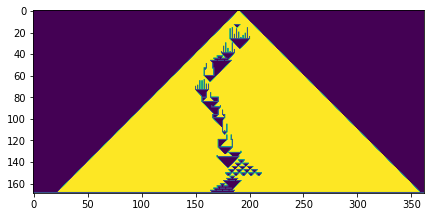

In [261]:

map = np.copy(new_data)
plt.figure(figsize=(7,21))
plt.imshow(map)

100%|██████████| 300/300 [13:29<00:00,  2.70s/it]


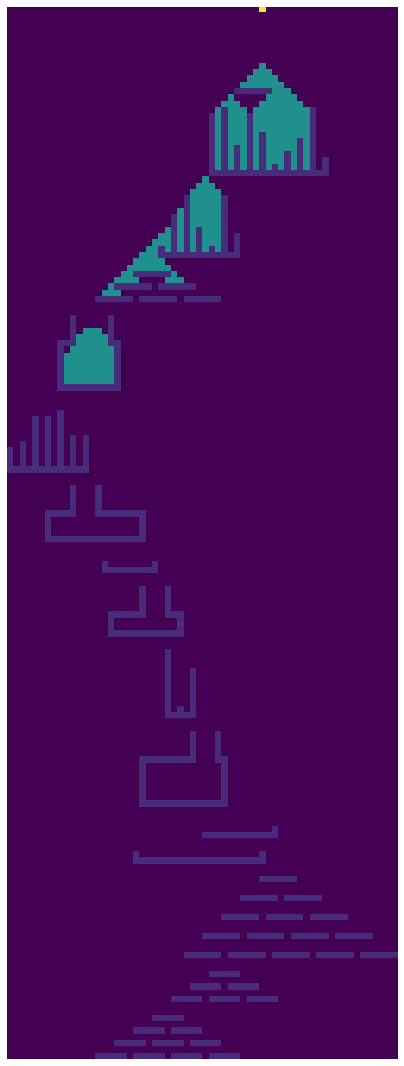

In [186]:
from matplotlib.animation import PillowWriter
from tqdm import tqdm

metadata = dict(title='Movie Test', artist='Matplotlib')
writer = PillowWriter(fps=15, metadata=metadata)

fig = plt.figure(figsize=(7,21))
plt.axis('off')

with writer.saving(fig, "writer_test2.gif", 100):
  for i in tqdm(range(300)):
    one_grain(new_data)
    map = np.copy(new_data)
    plt.imshow(map)
    writer.grab_frame()

# Day 15

In [83]:

with open("input_day15_example.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()

In [84]:
locations

[[2, 18, -2, 15],
 [9, 16, 10, 16],
 [13, 2, 15, 3],
 [12, 14, 10, 16],
 [10, 20, 10, 16],
 [14, 17, 10, 16],
 [8, 7, 2, 10],
 [2, 0, 2, 10],
 [0, 11, 2, 10],
 [20, 14, 25, 17],
 [17, 20, 21, 22],
 [16, 7, 15, 3],
 [14, 3, 15, 3],
 [20, 1, 15, 3]]

Xmin is -2, Xmax is 25, Ymin is 0, Ymax is 22
The grid is therefore 27 wide and 22 high


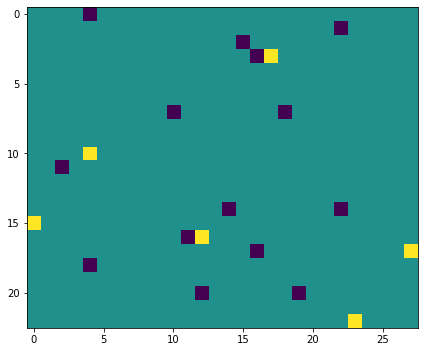

In [85]:
import numpy as np
import matplotlib.pyplot as plt


locations =[]
for line in data:
  tmp = line.replace('Sensor at x=', '')
  tmp = tmp.replace(', y=', ',')
  tmp = tmp.replace(': closest beacon is at x=', ',')
  tmp = tmp.split(',')
  locations.append([int(tmp[0]),int(tmp[1]),int(tmp[2]),int(tmp[3])] )


def manhattan(point1,point2):
  x1,y1 = point1
  x2,y2 = point2
  return abs(x1-x2)+abs(y1-y2)

xmin=locations[0][0]
xmax=locations[0][0]
ymin=locations[0][1]
ymax=locations[0][1]

# Find the min and max of the x and y
for l in locations:
  if l[0] < xmin:
    xmin = l[0]
  if l[0] > xmax:
    xmax = l[0]
  if l[1] < ymin:
    ymin = l[1]
  if l[1] > ymax:
    ymax = l[1]
  if l[2] < xmin:
    xmin = l[2]
  if l[2] > xmax:
    xmax = l[2]
  if l[3] < ymin:
    ymin = l[3]
  if l[3] > ymax:
    ymax = l[3]

width_x = xmax-xmin
width_y = ymax-ymin

print(f'Xmin is {xmin}, Xmax is {xmax}, Ymin is {ymin}, Ymax is {ymax}')
print(f'The grid is therefore {width_x} wide and {width_y} high')

# create the grid row / column
map = np.zeros((width_y+1,width_x+1), dtype=int)

# populate the grid with the locations
for l in locations:
  map[l[1]-ymin,l[0]-xmin] = -1 # the -1 is for the location of the sensor
  map[l[3]-ymin,l[2]-xmin] = 1 # the 1 is for the location of the beacon

# plot the map
plt.figure(figsize=(7,21))
plt.imshow(map)


In [79]:
def radiate(sensor, beacon):
  global xmin, xmax, ymin, ymax
  distance = manhattan(sensor,beacon)
  x1,y1 = sensor
  x2,y2 = beacon
  x1 = x1 - xmin
  y1 = y1 - ymin
  x2 = x2 - xmin
  y2 = y2 - ymin

  scan_xmin = x1 - distance
  scan_xmax = x1 + distance
  scan_ymin = y1 - distance
  scan_ymax = y1 + distance
  if scan_xmin < 0:
    scan_xmin = 0
  if scan_xmax > width_x:
    scan_xmax = width_x
  if scan_ymin < 0:
    scan_ymin = 0
  if scan_ymax > width_y:
    scan_ymax = width_y
  for i in range(scan_xmin,scan_xmax+1):
    for j in range(scan_ymin,scan_ymax+1):
      if map[j,i] == 0 and manhattan((i,j),(x1,y1)) <= distance:
        map[j,i] = 2





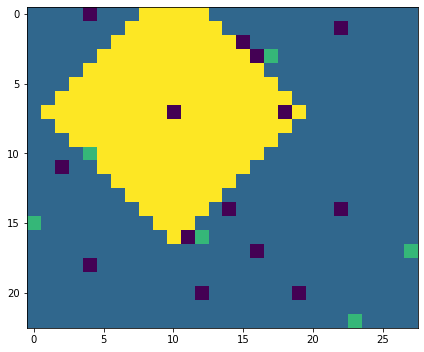

In [68]:
radiate((8,7),(2,10))
# plot the map
plt.figure(figsize=(7,21))
plt.imshow(map)


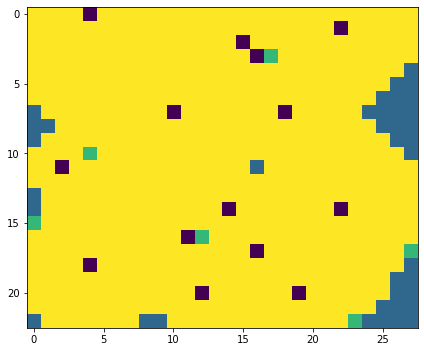

In [69]:
for l in locations:
  radiate((l[0],l[1]),(l[2],l[3]))

# plot the map
plt.figure(figsize=(7,21))
plt.imshow(map)


In [70]:
def check_a_row(row):
  global width_x
  count = 0
  for i in range(width_x):
    if map[row,i] == 2:
      count += 1

  print(f'The number of locations that can be reached is {count}')



In [71]:
check_a_row(10)

The number of locations that can be reached is 26


In [80]:
import numpy as np
import matplotlib.pyplot as plt


locations =[]
for line in data:
  tmp = line.replace('Sensor at x=', '')
  tmp = tmp.replace(', y=', ',')
  tmp = tmp.replace(': closest beacon is at x=', ',')
  tmp = tmp.split(',')
  locations.append([int(tmp[0]),int(tmp[1]),int(tmp[2]),int(tmp[3])] )


def manhattan(point1,point2):
  x1,y1 = point1
  x2,y2 = point2
  return abs(x1-x2)+abs(y1-y2)

xmin=locations[0][0]
xmax=locations[0][0]
ymin=locations[0][1]
ymax=locations[0][1]

# Find the min and max of the x and y
for l in locations:
  if l[0] < xmin:
    xmin = l[0]
  if l[0] > xmax:
    xmax = l[0]
  if l[1] < ymin:
    ymin = l[1]
  if l[1] > ymax:
    ymax = l[1]
  if l[2] < xmin:
    xmin = l[2]
  if l[2] > xmax:
    xmax = l[2]
  if l[3] < ymin:
    ymin = l[3]
  if l[3] > ymax:
    ymax = l[3]

width_x = xmax-xmin
width_y = ymax-ymin

print(f'Xmin is {xmin}, Xmax is {xmax}, Ymin is {ymin}, Ymax is {ymax}')
print(f'The grid is therefore {width_x} wide and {width_y} high')


Xmin is -2, Xmax is 25, Ymin is 0, Ymax is 22
The grid is therefore 27 wide and 22 high


In [89]:
locations

[[2, 18, -2, 15],
 [9, 16, 10, 16],
 [13, 2, 15, 3],
 [12, 14, 10, 16],
 [10, 20, 10, 16],
 [14, 17, 10, 16],
 [8, 7, 2, 10],
 [2, 0, 2, 10],
 [0, 11, 2, 10],
 [20, 14, 25, 17],
 [17, 20, 21, 22],
 [16, 7, 15, 3],
 [14, 3, 15, 3],
 [20, 1, 15, 3]]

In [107]:
# build a list of the beacons and their radiation max distance
beacons = []
for l in locations:
  beacons.append(([l[2],l[3],manhattan((l[0],l[1]),(l[2],l[3]))]))

# print the beacons we start with
for b in beacons:
  print(b)

def trim_beacons(the_beacons):
  # trim beacons so only largest distance is kept
  for b in the_beacons:
    for b2 in the_beacons:
      if b[0] == b2[0] and b[1] == b2[1] and b[2] < b2[2]:
        the_beacons.remove(b)
        trim_beacons(the_beacons)

  return the_beacons

print()
print()
# print the trimmed beacons
trimmed_beacons = trim_beacons(beacons)
for b in trimmed_beacons:
  print(b)


[-2, 15, 7]
[10, 16, 1]
[15, 3, 3]
[10, 16, 4]
[10, 16, 4]
[10, 16, 5]
[2, 10, 9]
[2, 10, 10]
[2, 10, 3]
[25, 17, 8]
[21, 22, 6]
[15, 3, 5]
[15, 3, 1]
[15, 3, 7]


[-2, 15, 7]
[10, 16, 5]
[2, 10, 10]
[25, 17, 8]
[21, 22, 6]
[15, 3, 7]


In [108]:
# let's take the row and check if the beacons can reach this position
count = 0
for x in range(xmin,xmax+1): #go from min to max on this row
  y = 10 # the row to check
  for b in trimmed_beacons: # for each sensor
    if manhattan((x,y),(b[0],b[1])) <= b[2]:
      print(f'({x},{y}) is in range of ({b[0]},{b[1]})')
      count += 1

print(f'The number of locations that can be reached is {count}')




(-2,10) is in range of (-2,15)
(-2,10) is in range of (2,10)
(-1,10) is in range of (-2,15)
(-1,10) is in range of (2,10)
(0,10) is in range of (-2,15)
(0,10) is in range of (2,10)
(1,10) is in range of (2,10)
(2,10) is in range of (2,10)
(3,10) is in range of (2,10)
(4,10) is in range of (2,10)
(5,10) is in range of (2,10)
(6,10) is in range of (2,10)
(7,10) is in range of (2,10)
(8,10) is in range of (2,10)
(9,10) is in range of (2,10)
(10,10) is in range of (2,10)
(11,10) is in range of (2,10)
(12,10) is in range of (2,10)
(15,10) is in range of (15,3)
(24,10) is in range of (25,17)
(25,10) is in range of (25,17)
The number of locations that can be reached is 21
